In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from matplotlib import pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("/content/Hitters.csv")

# Drop the NaN values
df.dropna(inplace=True)
df.head()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [ ]:
# ONE-HOT-ENCODING for non numerical data
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [ ]:
# Dropping the non numerical values and also ... ?
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")

In [ ]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [ ]:
# Concatenating some* of  the one hot encoded features one hot encoded values with the dataframe.But why not ALL ?
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

In [ ]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [ ]:
# Label
y = df["Salary"]

In [ ]:
# Holdout - Train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)

In [ ]:
# For alpha = 0.1
ridge_model.coef_

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [ ]:
ridge_model = Ridge(alpha=5).fit(X_train, y_train)
# For alpha = 5
ridge_model.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [ ]:
alpha_set = 10**np.linspace(10, -2, 100)*0.5 # -2 to 10, 100 values

In [ ]:
alpha_set

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [ ]:
# let's get coefs for some alphas
ridge_model = Ridge()
coefs = []

for i in alpha_set:
  ridge_model.set_params(alpha=i)
  ridge_model.fit(X_train, y_train)
  coefs.append(ridge_model.coef_)

In [ ]:
coefs

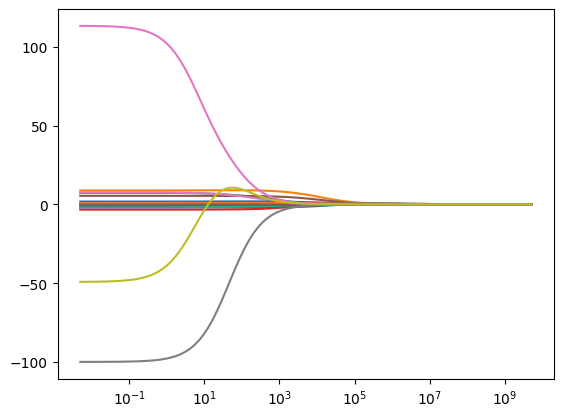

In [ ]:
ax = plt.gca()
ax.plot(alpha_set, coefs)
ax.set_xscale("log")

In [ ]:
# Prediction

ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_train)

pd.DataFrame([y_pred[0:10], y_train[0:10]]).T

,0,1
0,376.252454,125.0
1,803.384981,1940.0
2,496.176697,940.0
3,112.695546,375.0
4,427.600202,100.0
5,1003.630940,960.0
6,153.457139,90.0
7,361.338810,100.0
8,483.291437,750.0
9,916.914397,657.0


In [ ]:
RMSE=np.sqrt(mean_squared_error(y_train, y_pred))
RMSE
# Not a good performance.There's something wrong with the alpha.We need to chosoe wisely then.

289.34470696006565

In [ ]:
# CROSS VALIDATION is the key to the efficient selection
ridge_model = Ridge()
scores = cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")

In [ ]:
scores

array([-254472.04580573,  -60833.45970379, -154767.02339013,
        -85062.49424023,  -69816.89068641, -129298.84224708,
       -111727.92225975,  -85814.81291499,  -58347.4474604 ,
       -224630.58012366])

In [ ]:
# We get the true error
true_error_rmse =np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))
true_error_rmse

351.3931585606325

In [ ]:
# test errors
ridge_model = Ridge().fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
y_pred[:10]

array([ 610.65617195,  693.026009  , 1015.18797916,  408.93538433,
        420.8066687 ,  342.03579451,  659.24206436,  447.06500871,
        911.97037648,  647.245175  ])

In [ ]:
y_test[:10]

148    850.000
154    277.500
318    875.000
279    150.000
88     260.000
307    277.500
221    210.000
268    140.000
10     517.143
132    325.000
Name: Salary, dtype: float64

In [ ]:
np.sqrt(mean_squared_error(y_pred, y_test))

356.80829057302424

In [ ]:
# Model Tunning

lambdas = np.random.randint(0,1000,100)
lambdas2 = 10**-np.linspace(10, -2, 100)*0.5 # -2 to 10, 100 values

In [ ]:
ridge_cv=RidgeCV(alphas = lambdas2, scoring="neg_mean_squared_error", cv=10)
from sklearn.preprocessing import Normalizer


fitted=ridge_cv.fit(X_train, y_train)
fitted

RidgeCV(alphas=array([5.00000000e-11, 6.60970574e-11, 8.73764200e-11, 1.15506485e-10,
       1.52692775e-10, 2.01850863e-10, 2.66834962e-10, 3.52740116e-10,
       4.66301673e-10, 6.16423370e-10, 8.14875417e-10, 1.07721735e-09,
       1.42401793e-09, 1.88246790e-09, 2.48851178e-09, 3.28966612e-09,
       4.34874501e-09, 5.74878498e-09, 7.59955541e-09, 1.00461650e-08,
       1.32804389e-08, 1.75559587e-0...
       8.14875417e-02, 1.07721735e-01, 1.42401793e-01, 1.88246790e-01,
       2.48851178e-01, 3.28966612e-01, 4.34874501e-01, 5.74878498e-01,
       7.59955541e-01, 1.00461650e+00, 1.32804389e+00, 1.75559587e+00,
       2.32079442e+00, 3.06795364e+00, 4.05565415e+00, 5.36133611e+00,
       7.08737081e+00, 9.36908711e+00, 1.23853818e+01, 1.63727458e+01,
       2.16438064e+01, 2.86118383e+01, 3.78231664e+01, 5.00000000e+01]),
        cv=10, scoring='neg_mean_squared_error')

In [ ]:
# optimal lambda:
op_lambda = ridge_cv.alpha_
op_lambda

9.369087114301934

In [ ]:
# final model

ridge_tuned = Ridge(alpha=op_lambda).fit(X_test, y_test)
RMSE = np.sqrt(mean_squared_error(ridge_tuned.predict(X_test), y_test))
RMSE

297.13314809301113